In [129]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [130]:
import numpy
import pandas

In [131]:
import pandas as pd
rand_seed = 42

enzyme_gene = pd.read_csv("enzyme_gene.csv", index_col=0)
enzyme_gene

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
enzyme_gene.head(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0


In [133]:
enzyme_gene.shape

(5238, 18)

In [134]:
# get all feature names
features = enzyme_gene.columns[1:]
features

Index(['Func_likelihood', 'Fam_size', 'Max_id_paralog', 'WGD_alpha',
       'WGD_beta_gamma', 'Dup_recent', 'Dup_tandem', 'Singleton',
       'Max_PCC_GM_abiotic', 'Max_PCC_SM_abiotic', 'Max_PCC_GM_biotic',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_hormone', 'Max_PCC_SM_hormone',
       'Expr_med_dev', 'Expr_max_dev', 'Expr_breadth_dev'],
      dtype='object')

In [135]:
enzyme_gene.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT1G75280,SM,1.00,8.0,84.24,0.0,1.0,0.0,1.0,0.0,0.790,0.717,0.741,0.686,0.851,0.870,1491.610788,12540.263390,64.0
AT3G15800,unknown,0.82,88.0,61.50,0.0,0.0,0.0,0.0,0.0,0.758,0.666,0.905,0.886,0.833,0.773,17.760710,64.944346,13.0
AT5G07010,GM,0.84,18.0,85.19,1.0,0.0,0.0,1.0,0.0,0.642,0.836,0.940,0.921,0.831,0.824,40.365867,1838.455397,38.0
AT5G24070,unknown,0.24,82.0,69.05,0.0,0.0,0.0,0.0,0.0,0.801,0.714,0.929,0.896,0.657,0.710,5.092239,37.067361,2.0


In [136]:
enzyme_gene.describe()

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
count,3550.000000,4152.000000,3899.000000,4769.000000,4769.000000,4501.000000,4512.000000,4240.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4150.000000,4150.000000,4150.000000
mean,0.804897,29.770472,66.566127,0.279094,0.122667,0.049767,0.270612,0.051651,0.789531,0.725130,0.848149,0.793080,0.815422,0.746845,428.028998,2191.368616,44.368675
std,0.254692,41.524700,18.041234,0.448601,0.328089,0.217487,0.444325,0.221347,0.090319,0.106227,0.079397,0.099534,0.082482,0.104096,1042.343895,3327.095677,24.428359
min,0.000000,1.000000,19.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.322000,0.531000,0.445000,0.486000,0.412000,3.233606,5.763663,0.000000
25%,0.690750,4.000000,54.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.731000,0.655000,0.800000,0.728000,0.762000,0.673000,14.464360,326.100708,17.000000
50%,0.940000,11.000000,70.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.737000,0.857000,0.804000,0.822000,0.748000,117.897502,982.311288,60.000000
75%,0.990000,34.000000,80.420000,1.000000,0.000000,0.000000,1.000000,0.000000,0.857000,0.806000,0.908000,0.871000,0.878000,0.824250,400.282721,2564.031166,64.000000
max,1.000000,293.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.982000,0.982000,0.992000,0.983000,0.987000,0.978000,20115.064720,30288.301360,64.000000


In [137]:
enzyme_gene.nunique()

Label                    3
Func_likelihood        538
Fam_size                56
Max_id_paralog        2525
WGD_alpha                2
WGD_beta_gamma           2
Dup_recent               2
Dup_tandem               2
Singleton                2
Max_PCC_GM_abiotic     429
Max_PCC_SM_abiotic     503
Max_PCC_GM_biotic      383
Max_PCC_SM_biotic      450
Max_PCC_GM_hormone     397
Max_PCC_SM_hormone     487
Expr_med_dev          4150
Expr_max_dev          4149
Expr_breadth_dev        65
dtype: int64

In [138]:
enzyme_gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5238 entries, AT2G20690 to nan
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               4913 non-null   object 
 1   Func_likelihood     3550 non-null   float64
 2   Fam_size            4152 non-null   float64
 3   Max_id_paralog      3899 non-null   float64
 4   WGD_alpha           4769 non-null   float64
 5   WGD_beta_gamma      4769 non-null   float64
 6   Dup_recent          4501 non-null   float64
 7   Dup_tandem          4512 non-null   float64
 8   Singleton           4240 non-null   float64
 9   Max_PCC_GM_abiotic  4152 non-null   float64
 10  Max_PCC_SM_abiotic  4152 non-null   float64
 11  Max_PCC_GM_biotic   4152 non-null   float64
 12  Max_PCC_SM_biotic   4152 non-null   float64
 13  Max_PCC_GM_hormone  4152 non-null   float64
 14  Max_PCC_SM_hormone  4152 non-null   float64
 15  Expr_med_dev        4150 non-null   float64
 16  Expr

In [139]:
print(enzyme_gene["Label"].value_counts())

Label
unknown    2291
GM         2212
SM          410
Name: count, dtype: int64


In [140]:
enzyme_gene.isnull().sum()

Label                  325
Func_likelihood       1688
Fam_size              1086
Max_id_paralog        1339
WGD_alpha              469
WGD_beta_gamma         469
Dup_recent             737
Dup_tandem             726
Singleton              998
Max_PCC_GM_abiotic    1086
Max_PCC_SM_abiotic    1086
Max_PCC_GM_biotic     1086
Max_PCC_SM_biotic     1086
Max_PCC_GM_hormone    1086
Max_PCC_SM_hormone    1086
Expr_med_dev          1088
Expr_max_dev          1088
Expr_breadth_dev      1088
dtype: int64

In [141]:
import matplotlib
import seaborn

In [142]:
# The 1st ":" is to get all rows. The "1:" part is to get the 2nd column and on.
feature_values = enzyme_gene.iloc[:, 1:]
feature_values

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,
AT2G20690,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,NaN,2.0,50.3,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


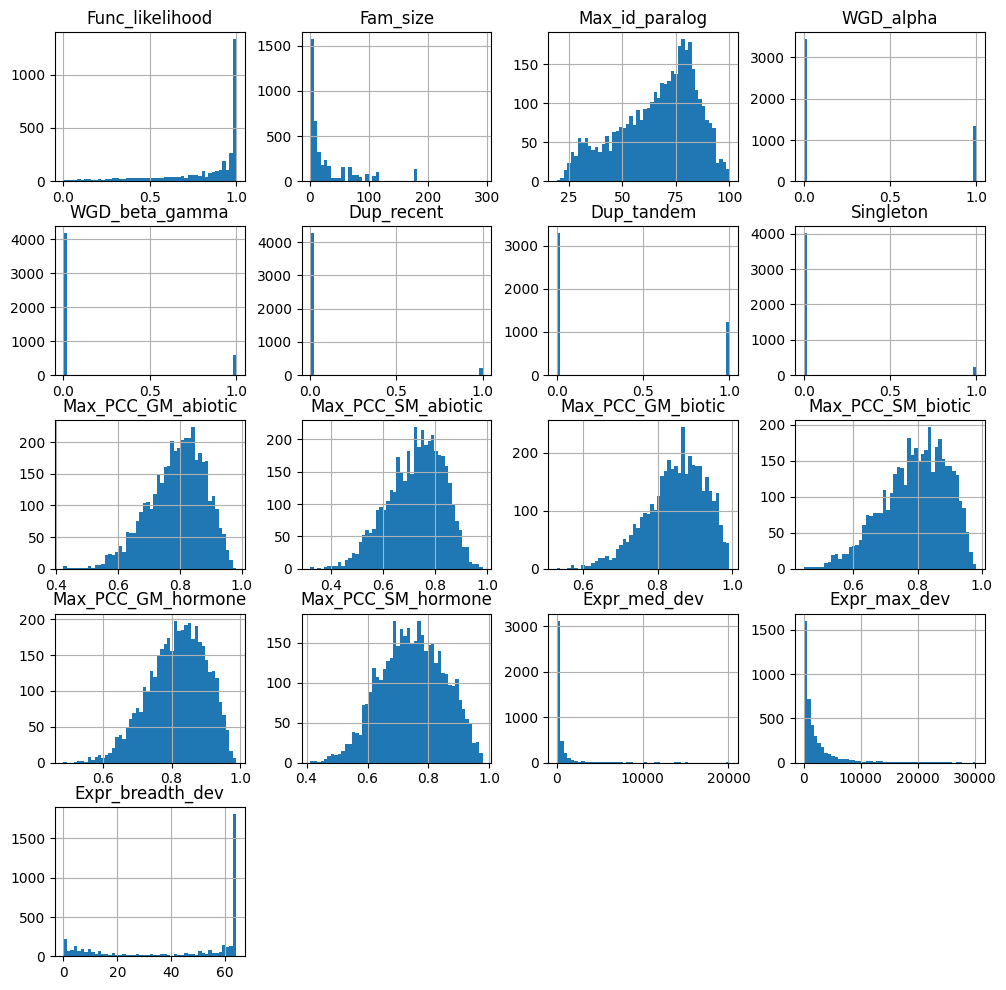

In [143]:
# Draw histogram
hist = feature_values.hist(figsize=(12,12), bins=50)

In [144]:
# Calculate Spearman's rank correlations for all feature pairs
corr = feature_values.corr(method ='spearman')
corr

,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Func_likelihood,1.000000,-0.425232,-0.044509,0.048101,-0.031368,-0.159467,-0.365871,0.145597,0.270916,0.046910,0.133880,0.010729,0.252289,0.087491,0.809380,0.486005,0.803178
Fam_size,-0.425232,1.000000,0.126797,-0.056985,0.013941,0.115253,0.344059,-0.206112,-0.158623,0.013337,-0.052723,0.028097,-0.096479,0.003539,-0.381190,-0.105345,-0.439901
Max_id_paralog,-0.044509,0.126797,1.000000,-0.028074,-0.000748,0.090542,0.231457,-0.274425,-0.026789,-0.020144,-0.027380,-0.002215,0.031349,0.060209,-0.013421,0.076196,-0.051526
WGD_alpha,0.048101,-0.056985,-0.028074,1.000000,0.068015,0.002366,-0.033998,0.006703,0.022448,-0.004108,0.002457,-0.011307,0.011289,0.000698,0.039406,-0.011395,0.049960
WGD_beta_gamma,-0.031368,0.013941,-0.000748,0.068015,1.000000,0.014659,-0.004633,-0.024479,-0.001354,-0.004194,0.014195,0.004963,0.009639,-0.004969,-0.020867,-0.006981,-0.028465
Dup_recent,-0.159467,0.115253,0.090542,0.002366,0.014659,1.000000,0.189511,-0.045019,-0.046663,-0.021227,-0.014142,0.008451,-0.088582,-0.061154,-0.105114,-0.102642,-0.118330
Dup_tandem,-0.365871,0.344059,0.231457,-0.033998,-0.004633,0.189511,1.000000,-0.141858,-0.072686,0.054327,0.009010,0.080658,-0.058476,0.042842,-0.294494,-0.136162,-0.330194
Singleton,0.145597,-0.206112,-0.274425,0.006703,-0.024479,-0.045019,-0.141858,1.000000,0.056676,-0.014765,0.032353,-0.006439,0.006871,-0.052028,0.108895,-0.041977,0.159309
Max_PCC_GM_abiotic,0.270916,-0.158623,-0.026789,0.022448,-0.001354,-0.046663,-0.072686,0.056676,1.000000,0.702527,0.327993,0.275294,0.166645,0.054970,0.312563,0.215558,0.238961
Max_PCC_SM_abiotic,0.046910,0.013337,-0.020144,-0.004108,-0.004194,-0.021227,0.054327,-0.014765,0.702527,1.000000,0.272101,0.311541,0.076733,0.103616,0.094686,0.151211,0.025415


<Axes: >

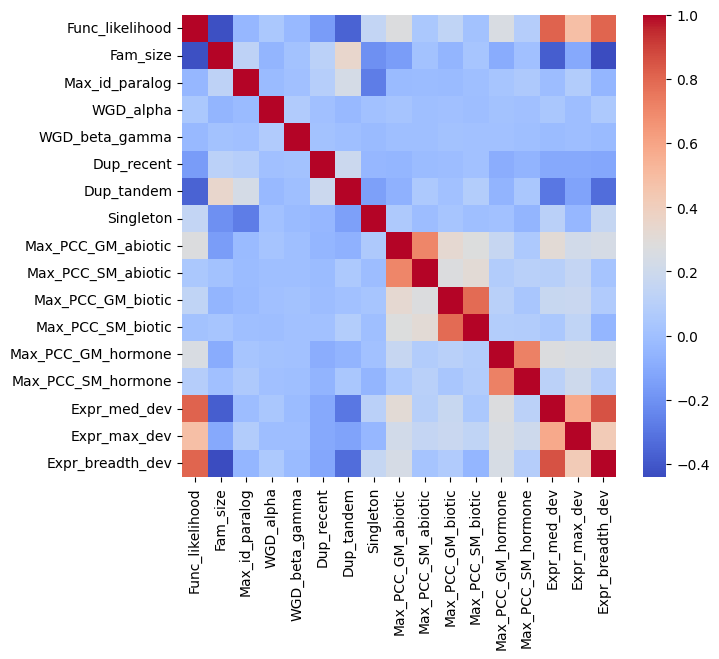

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(corr, cmap="coolwarm")

In [146]:
labels = ['GM', 'SM']
labels

['GM', 'SM']

In [147]:
label_column = enzyme_gene['Label']
label_column

Gene
AT2G20690     GM
AT5G10920     GM
AT4G02580     GM
AT5G52840     GM
AT4G02620     GM
            ... 
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
NaN          NaN
Name: Label, Length: 5238, dtype: object

In [148]:
labels              = ['GM', 'SM']
label_column        = enzyme_gene['Label']
label_column_filter = label_column.isin(labels)

# enzyme_gene dataframe with only GM and SM
enzyme_gene_fil = enzyme_gene[label_column_filter]

# Count the occurence of unique values
enzyme_gene_fil['Label'].value_counts()

Label
GM    2212
SM     410
Name: count, dtype: int64

In [149]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,GM,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,GM,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,GM,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,GM,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,GM,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,SM,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,SM,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,SM,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [150]:
# import the proprecessing functions
from sklearn import preprocessing

# Create a LabelEncoder object: this is simply a software tool that turn
# (encode) texts into 0 or 1 (labels) in this case.
le = preprocessing.LabelEncoder()

# Send the Label column of enzyme_gene_fil dataframe to the LabelEncoder so
# it can fit (i.e., learn) how to encode the labels.
le.fit(enzyme_gene_fil.Label)

# Now, used the fitted (learned) encoder to transform texts to labels
enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)

<ipython-input-150-53b6e9b3aa14>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enzyme_gene_fil['Label'] = le.transform(enzyme_gene_fil.Label)


In [151]:
enzyme_gene_fil

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.753,0.499,0.894,0.864,0.891,0.698,267.526949,696.584746,64.0
AT5G10920,0,0.95,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.857,0.777,0.861,0.786,0.912,0.781,308.549282,856.234097,64.0
AT4G02580,0,1.00,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.824,0.699,0.912,0.736,0.921,0.801,2107.629695,3326.370884,64.0
AT5G52840,0,NaN,2.0,50.30,0.0,1.0,0.0,0.0,1.0,0.810,0.617,0.885,0.630,0.919,0.852,1543.909031,2561.466645,64.0
AT4G02620,0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.630,0.519,0.900,0.883,0.875,0.634,1782.411856,4270.191516,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,1,0.64,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.805,0.782,0.877,0.873,0.753,0.674,9.913486,214.331178,4.0
AT2G29460,1,0.96,28.0,78.12,0.0,0.0,0.0,1.0,0.0,0.917,0.924,0.929,0.904,0.888,0.924,36.188886,1076.312933,43.0
AT1G59700,1,0.95,28.0,76.75,0.0,0.0,0.0,1.0,0.0,0.810,0.781,0.905,0.849,0.904,0.894,249.963625,1529.277824,62.0


In [152]:
enzyme_gene_fil['Label'].value_counts()

Label
0    2212
1     410
Name: count, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
                enzyme_gene_fil,                # The data to split
                test_size=0.2,                  # Proportion data for testing
                stratify=enzyme_gene_fil.Label, # Make sure proportions of 0/1
                                                # labels are similar between
                                                # training and testing sets
                random_state=rand_seed)

In [154]:
# Print out proportions of different labels in the training data
print(train['Label'].value_counts()/train.shape[0])

Label
0    0.843586
1    0.156414
Name: count, dtype: float64


In [155]:
# Print out proportions of different labels in the testing data
print(test['Label'].value_counts()/test.shape[0])

Label
0    0.84381
1    0.15619
Name: count, dtype: float64


In [156]:
enzyme_gene_fil.shape

(2622, 18)

In [157]:
# ask which values are null.
row_na     = enzyme_gene_fil.isnull()
row_na

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
Gene,,,,,,,,,,,,,,,,,,
AT2G20690,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
AT5G10920,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02580,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT5G52840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT4G02620,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G59670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT2G29460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AT1G59700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [158]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = train.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT1G44575     1
AT1G16350     2
AT4G00500     1
AT4G26850     3
ATCG00670    13
dtype: int64

In [159]:
num_feat     = train.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
train_keep = train[rows_to_keep]             # training data with rows to keep
train_keep['Label'].value_counts()

Label
0    1529
1     272
Name: count, dtype: int64

In [160]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# Train the imputer with training data
imputer.fit(train_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
train_keep_imp = imputer.transform(train_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
train_keep_imp = pd.DataFrame(train_keep_imp, columns=train.columns)
train_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
1113,0.0,0.990,28.0,30.080,0.0,0.0,0.0,0.0,0.0,0.806,0.620,0.730,0.530,0.838,0.636,215.465868,691.528821,64.0
1336,0.0,0.718,1.0,66.670,0.0,1.0,0.0,0.2,0.0,0.670,0.724,0.735,0.780,0.756,0.687,17.362100,14169.562860,15.0
404,0.0,0.878,4.0,72.410,1.0,1.0,0.0,0.0,0.0,0.856,0.801,0.809,0.746,0.895,0.858,240.494470,967.231243,64.0
1464,0.0,1.000,1.0,32.074,1.0,0.0,0.0,0.0,0.0,0.812,0.710,0.844,0.796,0.836,0.740,133.957662,272.484528,64.0


In [161]:
# count the mising values (null, NA, or called NaN: Not a Number) of each crow
row_na_num = test.isnull().sum(axis=1)
row_na_num[:5]

Gene
AT3G28180    0
AT2G12190    0
AT2G33040    0
AT4G29680    0
AT1G36160    0
dtype: int64

In [162]:
num_feat     = test.shape[1] - 1            # number of features in the data
rows_to_keep = row_na_num/num_feat < 0.25    # rows with <25% missing values
test_keep = test[rows_to_keep]             # training data with rows to keep
test_keep['Label'].value_counts()

Label
0    367
1     63
Name: count, dtype: int64

In [163]:
from sklearn.impute import KNNImputer

# Create an imputer object to imptue our data
# n_neighbors is the number of neighbors used to estimate the missing values.
imputer = KNNImputer(n_neighbors=5)

# test the imputer with testing data
imputer.fit(test_keep)

# Transform missing values into imputed values, hence train_keep_imp (imputed)
test_keep_imp = imputer.transform(test_keep)

# The thing with KNNImputer is it create train_keep_imp as a Numpy array so
# we don't have the column names any more. Because I really want to know what
# these columns are, so let's turn this back to a DataFrame with column names.
test_keep_imp = pd.DataFrame(test_keep_imp, columns=test.columns)
test_keep_imp.sample(4)

,Label,Func_likelihood,Fam_size,Max_id_paralog,WGD_alpha,WGD_beta_gamma,Dup_recent,Dup_tandem,Singleton,Max_PCC_GM_abiotic,Max_PCC_SM_abiotic,Max_PCC_GM_biotic,Max_PCC_SM_biotic,Max_PCC_GM_hormone,Max_PCC_SM_hormone,Expr_med_dev,Expr_max_dev,Expr_breadth_dev
335,0.0,0.400,33.0,91.93,0.0,0.0,0.0,1.0,0.0,0.745,0.703,0.810,0.770,0.893,0.756,5.119176,384.883433,6.0
212,0.0,0.925,16.0,79.05,0.0,0.0,0.0,1.0,0.0,0.789,0.713,0.831,0.649,0.642,0.543,21.809277,3914.280313,31.0
47,0.0,1.000,2.0,93.19,1.0,0.0,0.0,0.2,0.0,0.693,0.605,0.942,0.925,0.892,0.821,860.083259,8190.617176,64.0
352,0.0,0.980,3.0,71.91,0.0,0.0,0.0,0.0,0.0,0.881,0.838,0.981,0.906,0.773,0.619,5536.181159,11765.708350,64.0


In [164]:
x_train_bal.describe()

NameError: name 'x_train_bal' is not defined

In [ ]:
from sklearn.preproceesing import RobustScalar

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train_bal)

In [ ]:
X_train_bal.describe()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
def run_randomforest(X_train, y_train):

In [ ]:
train_keep_imp.head()
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# training features
X_train = train_keep_imp.iloc[:,1:]

# training labels
y_train = train_keep_imp.iloc[:,0]

# This will be used in many other occasions.
feat_names = X_train.columns

# summarize class distribution
counter = Counter(y_train)
print("Before:", counter)

# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("After :", counter)



In [ ]:
X_train_bal.describe()
from sklearn.preprocessing import RobustScaler

# initialize a scaler
scaler = RobustScaler()

# fit the scaler with training features
scaler.fit(X_train_bal)

# transform the training feature values with the fitted scaler
X_train_scale = scaler.transform(X_train_bal)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.describe()

In [ ]:
X_test = test_keep_imp.iloc[:,1:]
y_test = test_keep_imp.iloc[:,0]

X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a function for running RandomForest
def run_randomforest(X_train, y_train):
    # Below is a Python dictionary specify the hyperparameters to be tested
    #  2x3x4x1 = 24
    param_grid = {'n_estimators': [200, 500],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth' : [3,5,7,9],
                  'criterion' :['entropy']}

    # Initialize a random forest classifier (rfc) with a random seed
    rfc = RandomForestClassifier(random_state=rand_seed)

    # Initialize a grid search object that will search through each of the 24
    # hyperparameter combinations. For each combination, a five fold cross-
    # validation (cv) is done. So totally 24x5 = 120 random forest classifiers
    # will be build.
    rfc_gs = GridSearchCV(
                rfc,
                param_grid,
                 cv=5,              # cross validation folds
                verbose=2,         #
                scoring='roc_auc', # find model with the best ROC-AUC
                n_jobs=8)          # number of concurrent jobs, you need to
                                   # adjust this based on the number of CPU cores
                                   # available on your machine.

    # Pass the training feaure and label data to the grid search object and
    # start fitting (training) models
    rfc_gs.fit(X_train, y_train)

    # Return the fitted grid search object
    return rfc_gs

In [165]:
rfc_gs = run_randomforest(X_train_scale, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [166]:
best_model = rfc_gs.best_estimator_

# Note that the best hyperparameters are also reported
best_model
# The best ROC-AUC score averged across CV folds for the best model
print(rfc_gs.best_score_)


0.9262575843979348


In [169]:
import pickle
filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

In [170]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# COMMENT: What does this do?
#
param_grid = {'C': [1, 10, 1e2],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# COMMENT: What does this do?
#
svc    = SVC()

# COMMENT: What does this do?
#
svc_gs = GridSearchCV(svc, param_grid, cv=5, verbose=2, scoring='roc_auc',
                      n_jobs=8)

# COMMENT: What does this do?
#
svc_gs.fit(X_train_scale, y_train)

# COMMENT: What does this do?
#
filename = "model_svc_gridsearch.save"
pickle.dump(svc_gs.best_estimator_, open(filename, 'wb'))

# COMMENT: What does these do?
#
print(svc_gs.best_params_)
print(svc_gs.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.9008583451865156


In [171]:
from sklearn.inspection import permutation_importance

# Specify the best model (estimator) from our RandomForest run
rfc = rfc_gs.best_estimator_

# Calculate permutation importance of each feature
result = permutation_importance(
    rfc, X_train_scale, y_train, n_repeats=10, random_state=42, n_jobs=8)

# COMMENTS: What can you find in the result?
#
#
result

{'importances_mean': array([0.02536825, 0.19631751, 0.01759411, 0.0096563 , 0.00613748,
        0.00090016, 0.06022913, 0.00114566, 0.01219313, 0.02274959,
        0.01800327, 0.01481178, 0.01104746, 0.02438625, 0.02086743,
        0.03060556, 0.02348609]),
 'importances_std': array([0.00429916, 0.01118721, 0.0030234 , 0.0012027 , 0.00083854,
        0.00085436, 0.00437941, 0.00065466, 0.00134216, 0.00230879,
        0.00210233, 0.00188216, 0.00197928, 0.00225004, 0.00240678,
        0.00180033, 0.0019725 ]),
 'importances': array([[0.02454992, 0.03600655, 0.02536825, 0.02209493, 0.02864157,
         0.02373159, 0.0188216 , 0.02373159, 0.02618658, 0.02454992],
        [0.19312602, 0.19067103, 0.21194763, 0.18494272, 0.20949264,
         0.21358429, 0.19067103, 0.17839607, 0.19312602, 0.19721768],
        [0.0212766 , 0.01800327, 0.02045827, 0.01309329, 0.01472995,
         0.01554828, 0.01800327, 0.01718494, 0.02291326, 0.01472995],
        [0.00818331, 0.00818331, 0.00981997, 0.009819

In [172]:
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_idx

array([ 1,  6, 15,  0, 13, 16,  9, 14, 10,  2, 11,  8, 12,  3,  4,  7,  5])

In [173]:
importance_values = result.importances[sorted_idx].T

In [174]:
ordered_feature_label = X_train_scale.columns[sorted_idx]
ordered_feature_label

Index(['Fam_size', 'Dup_tandem', 'Expr_max_dev', 'Func_likelihood',
       'Max_PCC_SM_hormone', 'Expr_breadth_dev', 'Max_PCC_SM_abiotic',
       'Expr_med_dev', 'Max_PCC_GM_biotic', 'Max_id_paralog',
       'Max_PCC_SM_biotic', 'Max_PCC_GM_abiotic', 'Max_PCC_GM_hormone',
       'WGD_alpha', 'WGD_beta_gamma', 'Singleton', 'Dup_recent'],
      dtype='object')

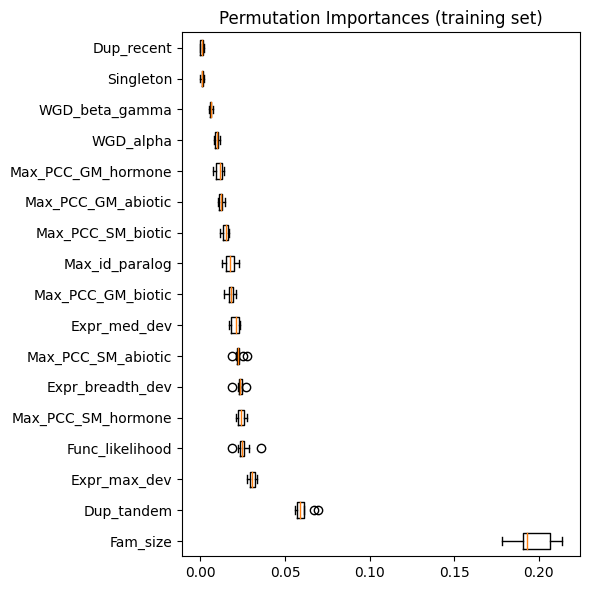

In [175]:
fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(importance_values,
           vert=False,
           labels=ordered_feature_label)
ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
plt.show()

In [176]:
feat_top10 = ordered_feature_label[:10]

# Get training data with only the top 10 features
X_train_top10 = X_train_scale[feat_top10]
X_train_top10.shape

(1222, 10)

In [177]:
X_test_top10 = X_test_scale[feat_top10]
X_test_top10.shape

(430, 10)

In [178]:
rfc_gs_top10 = run_randomforest(X_train_top10, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [180]:
filename = "model_randomforest_gridsearch_top10feat.save"

pickle.dump(rfc_gs_top10.best_estimator_, open(filename, 'wb'))
rfc_gs_top10.best_score_

0.9256778163051719

In [181]:
feat_top13 = ordered_feature_label[:13]

# Get training data with only the top 10 features
X_train_top13 = X_train_scale[feat_top13]
X_train_top13.shape

(1222, 13)

In [182]:
X_test_top13 = X_test_scale[feat_top13]
X_test_top13.shape

(430, 13)

In [183]:
rfc_gs_top13 = run_randomforest(X_train_top13, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [184]:
filename = "model_randomforest_gridsearch_top13feat.save"

pickle.dump(rfc_gs_top13.best_estimator_, open(filename, 'wb'))
rfc_gs_top13.best_score_

0.9233745845923925

In [186]:
filename2 = "model_randomforest_gridsearch_top10feat.save"

# load model from file
rfc_loaded_top10 = pickle.load(open(filename2, 'rb')) # model using top 10

# predict testing data labels with the model using top 10 features
y_test_pred = rfc_loaded_top10.predict(X_test_top10)
# Take a look at the 1st 40 predictions
print(y_test_pred[:40])
# Also take a look at the 1st 40 TRUE values
print(numpy.array(y_test[:40]))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get confusion matrrix
cm_top10 = confusion_matrix(y_test, y_test_pred)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


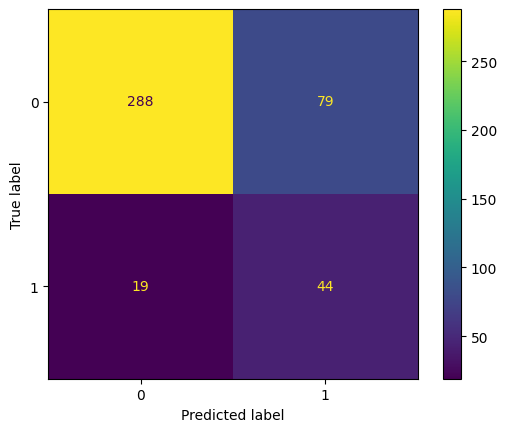

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get confusion matrrix
cm_top10 = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm_top10).plot()

In [188]:
from sklearn.metrics import classification_report

# Set class names
targets = ["GM", "SM"]

report = classification_report(y_test, y_test_pred, target_names=targets)
print(report)

              precision    recall  f1-score   support

          GM       0.94      0.78      0.85       367
          SM       0.36      0.70      0.47        63

    accuracy                           0.77       430
   macro avg       0.65      0.74      0.66       430
weighted avg       0.85      0.77      0.80       430

